<a href="https://colab.research.google.com/github/demward/NeuralNetwork_HousePrice_Prediction/blob/master/Project1_HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## Data Extraction

Visualize the data

In [56]:
houses = pd.read_csv('kc_house_data.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Remove outliers

In [57]:
category_series=houses['price'].value_counts()

category_series[category_series>=5].index

filtered_house=houses[houses['price'].isin(category_series[category_series>=5].index)]

In [63]:
X = filtered_house.drop(['price','id','date'], axis = 1)
y = filtered_house['price']

In [64]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Split the data between test set and train set

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 27)



## Standarize and One Hot Encode the dataset

In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["bedrooms", "bathrooms", "sqft_living","sqft_lot",'floors',
       "waterfront", "view", "condition", "grade", "sqft_above","sqft_basement", "yr_built"
       , "yr_renovated", "lat", "long","sqft_living15", "sqft_lot15"]),
    (OneHotEncoder(handle_unknown="ignore"), ["zipcode"])
)

ct.fit(X_train)

X_train_standard = ct.transform(X_train)
X_test_standard = ct.transform(X_test)

In [67]:
X_train_standard[0].shape

(1, 87)

## Model Implementation


In [91]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(27)

initializer = tf.keras.initializers.glorot_uniform(seed=27)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3) # To stop the model if it's no improvement for 3 consecutives epochs

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Input(shape=(X_train_standard.shape[1],)))
model_1.add(tf.keras.layers.Dense(100,kernel_initializer=initializer,activation = "relu"))
model_1.add(tf.keras.layers.Dense(64,kernel_initializer=initializer,activation = "relu"))
#model_1.add(tf.keras.layers.Dense(4,kernel_initializer=initializer,activation = "relu"))
model_1.add(tf.keras.layers.Dense(1,kernel_initializer=initializer))

model_1.compile(loss = "mse",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics = ["mse", "mae", "mape"])

history = model_1.fit(X_train_standard, y_train, epochs = 200, callbacks = [callback])

Epoch 1/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 102599647232.0000 - mae: 209265.3438 - mape: 43.1737 - mse: 102599647232.0000
Epoch 2/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16289373184.0000 - mae: 81114.6484 - mape: 17.2283 - mse: 16289373184.0000
Epoch 3/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14960589824.0000 - mae: 78013.4688 - mape: 16.5554 - mse: 14960589824.0000
Epoch 4/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13471136768.0000 - mae: 73876.1250 - mape: 15.5513 - mse: 13471136768.0000
Epoch 5/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12514780160.0000 - mae: 71252.9141 - mape: 14.8779 - mse: 12514780160.0000
Epoch 6/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11980935168.0000 - mae: 69902.3203 - mape: 14.5566 - mse: 11980935168.0000
Epoch 7/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11584349184.0000 - mae: 68929.7031 - mape: 14.3423 - mse: 11584349184.0000
Epoch 8/200
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2

### Model Evaluation

In [92]:
test_evaluation = model_1.evaluate(X_test_standard, y_test)
mae_train = history.history['mae'][-1]
mae_test = test_evaluation[2]

mse_train = history.history['mse'][-1] ** 0.5
mse_test = test_evaluation[1] ** 0.5

mae_average = (0.2 * mae_train + 0.8 * mae_test)
mse_average = (0.2 * mse_train + 0.8 * mse_test)

print(round(mae_train), round(mse_train))
print(round(mae_test), round(mse_test))
print(round(mae_average), round(mse_average))
print(history.history['mape'][-1])

"""
57953 85203
64718 116125
63365 109941
12.439774513244629
""" ;

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10222976000.0000 - mae: 62313.7539 - mape: 12.5551 - mse: 10222976000.0000
57478 86240
63404 105009
62219 101255
12.252913475036621


In [93]:
model_1.summary() # To see the architecture of the best model (Only refresh when you obtain a better model)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 100)                 │           8,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,989 (179.65 KB)

 Trainable params: 15,329 (59.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,660 (119.77 KB)

dict_keys(['loss', 'mae', 'mape', 'mse'])


Text(0.5, 0, 'epochs')

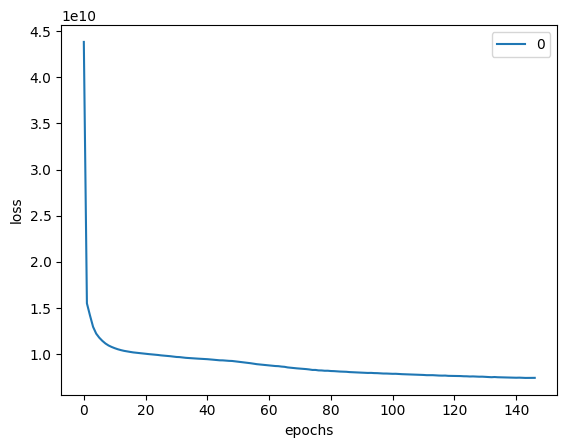

In [94]:
# Plot history (also known as loss curve or a training curve)

print(history.history.keys())

pd.DataFrame(history.history['loss']).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [95]:
y_pred = model_1.predict(X_test_standard)

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

errors = (tf.squeeze(y_pred) / y_test- 1) * 100
print(np.mean(errors))
print(np.std(errors))
print(mean_absolute_percentage_error(y_test, y_pred))

"""
0.69180655
19.761791
0.12887792862463054
""";

0.69180655
19.761791
0.12887792862463054


-23.505915 33.23022
171
171
3076


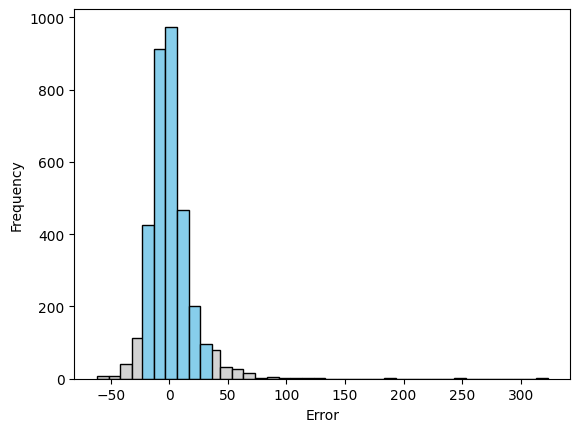

In [97]:
import matplotlib.pyplot as plt
percentiles = np.percentile(errors, [5,95])

errors = np.sort(errors)

group1 = errors[errors <= percentiles[0]]
group2 = errors[errors >= percentiles[1]]
group3 = errors[(errors < percentiles[1]) & (errors > percentiles[0])]

print(min(group3), max(group3)) # -23.505915 33.23022 (For 100,64 architecture)

plt.hist(group1, bins= np.arange(min(group1),max(group1 + 10),10), color='lightgray', edgecolor='black')
plt.hist(group2, bins= np.arange(min(group2),max(group2 + 10),10), color='lightgray', edgecolor='black')
plt.hist(group3, bins= np.arange(min(group3),max(group3 + 10),10), color='skyblue', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show();